In [2]:
import sklearn.tree
import pandas

In [5]:
phonecases = pandas.read_csv('../../data/phonecase.csv')

In [6]:
phonecases

,Age,Income,Colour
0,12,0,Red
1,14,10,Red
2,15,0,Red
3,17,500,Yellow
4,18,10000,Red
5,19,30000,Yellow
6,21,0,Yellow
7,21,20000,Yellow
8,23,30000,Yellow
9,25,40000,Pink


In [7]:
X = phonecases[['Age','Income']]

In [8]:
y = phonecases.Colour

In [40]:
dtc = sklearn.tree.DecisionTreeClassifier(max_depth=1)

In [41]:
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [42]:
try:
 from StringIO import StringIO
except ImportError:
 from io import StringIO
import sklearn.tree
import IPython.display
import pydot
File_obj = StringIO()
sklearn.tree.export_graphviz(dtc, out_file=File_obj, feature_names=['Age', 'Income'])

In [45]:
print(File_obj.getvalue())

digraph Tree {
node [shape=box] ;
0 [label="Age <= 24.0\ngini = 0.6667\nsamples = 18\nvalue = [6, 6, 6]"] ;
1 [label="gini = 0.4938\nsamples = 9\nvalue = [0, 4, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.4938\nsamples = 9\nvalue = [6, 2, 1]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


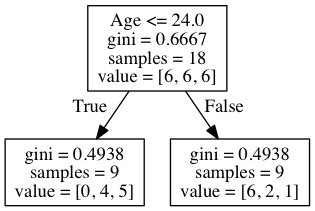

In [18]:
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph[0].create_png())

In [16]:
dtc.predict([[21, 150000]])

array(['Yellow'], dtype=object)

In [17]:
dtc.predict_proba([[21, 150000]])

array([[ 0.        ,  0.44444444,  0.55555556]])

In [21]:
dtc = sklearn.tree.DecisionTreeClassifier(max_depth=2)
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

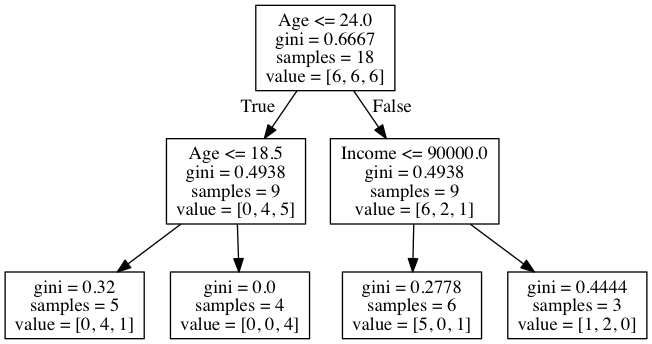

In [22]:
File_obj = StringIO()
sklearn.tree.export_graphviz(dtc, out_file=File_obj, feature_names=['Age', 'Income'])
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph[0].create_png())

In [25]:
dtc = sklearn.tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

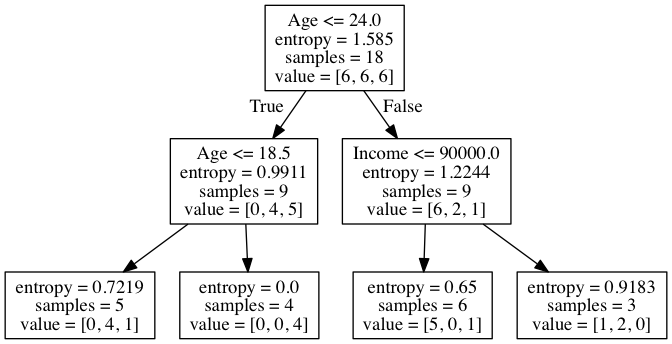

In [26]:
File_obj = StringIO()
sklearn.tree.export_graphviz(dtc, out_file=File_obj, feature_names=['Age', 'Income'])
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph[0].create_png())

In [27]:
dtc = sklearn.tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [37]:
dtc.feature_importances_

array([ 0.8164193,  0.1835807])

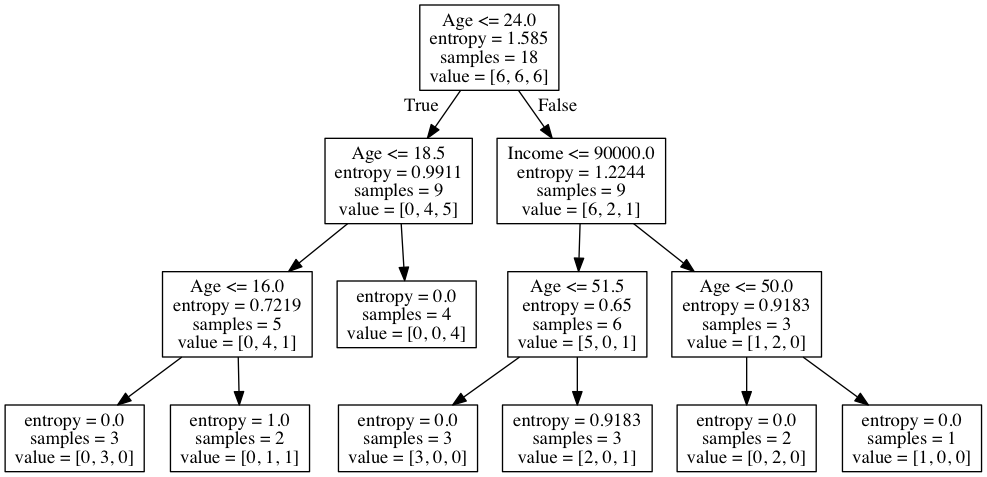

In [28]:
File_obj = StringIO()
sklearn.tree.export_graphviz(dtc, out_file=File_obj, feature_names=['Age', 'Income'])
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph[0].create_png())

In [29]:
import sklearn.grid_search

/Users/gregb/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/gregb/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [33]:

brute_force = sklearn.grid_search.GridSearchCV(
    sklearn.tree.DecisionTreeClassifier(),
    param_grid = {
        'max_depth': [1,2,3,4,5],
        'criterion': ['gini', 'entropy']
    },
    cv=3
)

In [34]:
brute_force.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [35]:
brute_force.best_params_

{'criterion': 'gini', 'max_depth': 4}

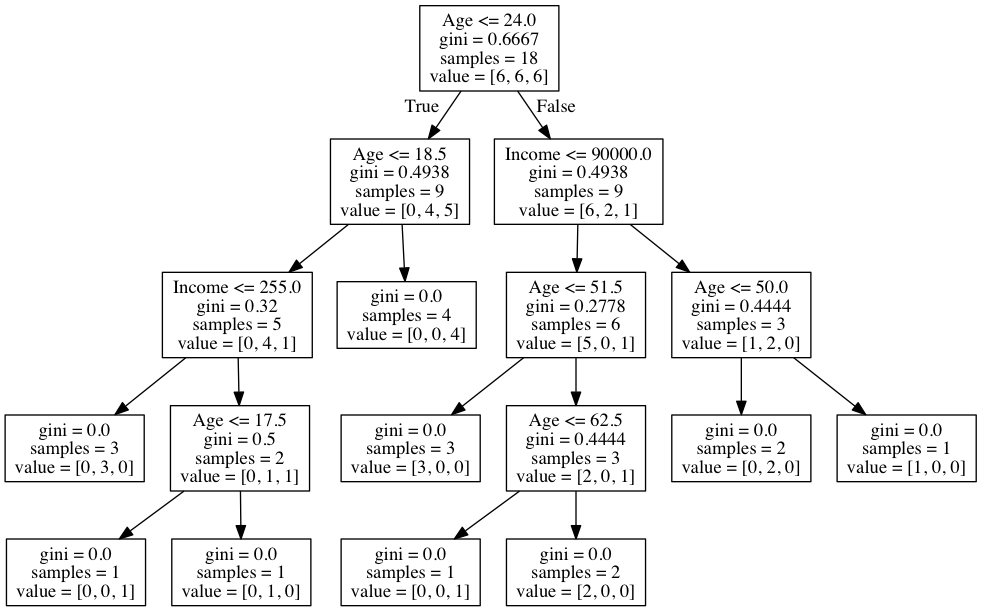

In [36]:
File_obj = StringIO()
sklearn.tree.export_graphviz(brute_force.best_estimator_, 
                             out_file=File_obj, feature_names=['Age', 'Income'])
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph[0].create_png())

In [38]:
dtc_reduced = sklearn.tree.DecisionTreeClassifier(max_depth=2)
dtc_reduced.fit(phonecases[['Age']], phonecases.Colour)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

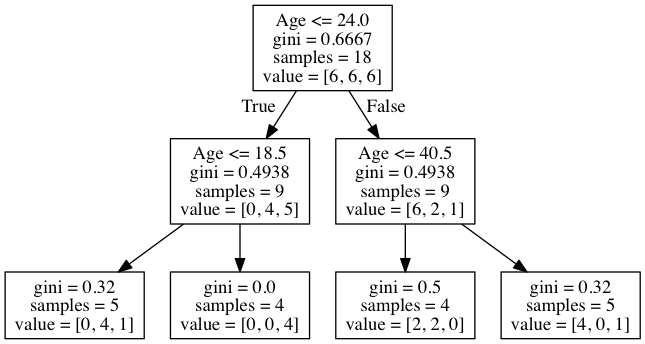

In [39]:
File_obj = StringIO()
sklearn.tree.export_graphviz(dtc_reduced,
                             out_file=File_obj, feature_names=['Age', 'Income'])
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph[0].create_png())